In [1]:
pip install tensorflow numpy pandas matplotlib

In [2]:
#Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [3]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize and reshape data for CNN input
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 60s 136ms/step - accuracy: 0.8414 - loss: 0.5105 - val_accuracy: 0.9852 - val_loss: 0.0503
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 132ms/step - accuracy: 0.9837 - loss: 0.0524 - val_accuracy: 0.9862 - val_loss: 0.0414
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 53s 126ms/step - accuracy: 0.9891 - loss: 0.0336 - val_accuracy: 0.9892 - val_loss: 0.0414
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 127ms/step - accuracy: 0.9919 - loss: 0.0271 - val_accuracy: 0.9872 - val_loss: 0.0412
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 52s 122ms/step - accuracy: 0.9935 - loss: 0.0193 - val_accuracy: 0.9913 - val_loss: 0.0344
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 121ms/step - accuracy: 0.9948 - loss: 0.0159 - val_accuracy: 0.9907 - val_loss: 0.0371
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 122ms/step - accuracy: 0.9947 - loss: 0.0148 - val_accuracy: 0.9895 - val_loss: 0.0340
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 120ms/step - accuracy: 0.9961 - loss: 0

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9902 - loss: 0.0356
Test Accuracy: 0.9924


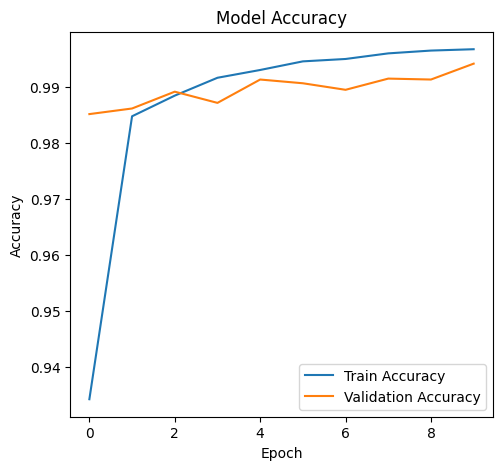

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

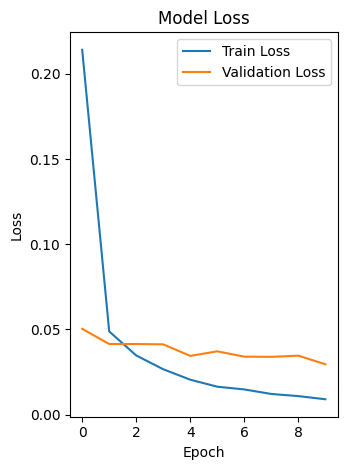

In [10]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


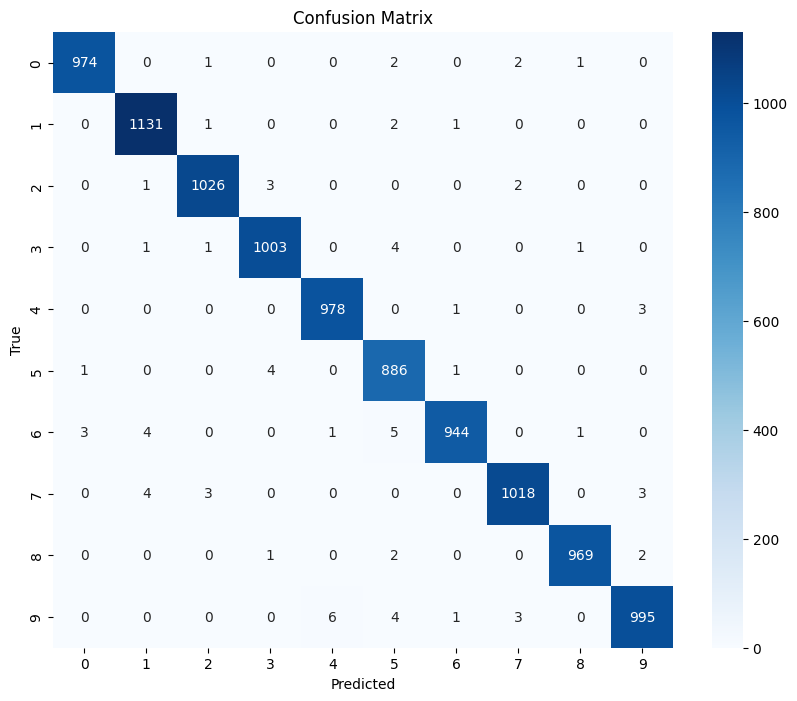

In [12]:
# Generate predictions and confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



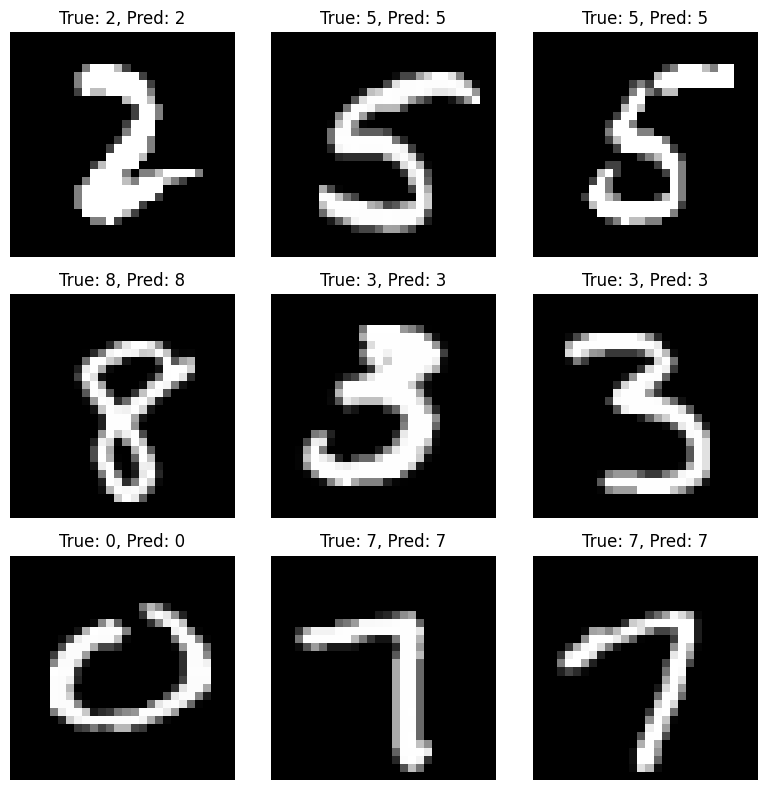

In [14]:
# Visualize some predictions
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(x_test))
    ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()
